# Objective :  To predict the occurance of Attrition in a company.

In this task we need to predict the occurance of Attrition in a company on the basis of other features like Age, BussinessTravel, Daily Rate, etc.

* The target feature is Attrition in this dataset.

#### Import various libraries necessary for this task to get completed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
an = pd.read_csv('./Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
an.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
an.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Now checking for the dimensions, description and pressence of null values in the dataset.

In [5]:
an.shape

(1470, 35)

In [6]:
an.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
an.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

From the above we can conclude this about dataset : 
* dataset contains 1470 rows and 35 columns
* description of the dataset gives mean, max Value, min value, etc of each column present in the dataset who has continuous data in them
* The no null value present in the dataset

#### Checking the data type of each column present in dataset.

In [8]:
an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### EDA

1. Age

In [9]:
an['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

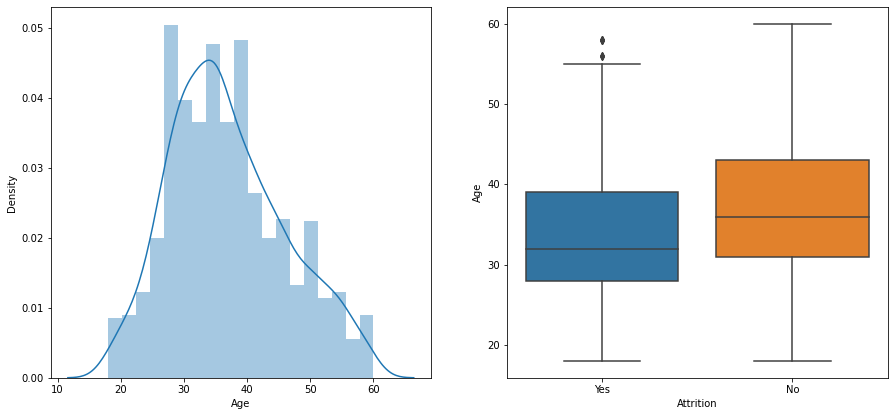

In [10]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['Age'])
plt.xlabel('Age')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'Age', data= an)
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

By looking at both the graphs of Age we can conclude that data is positively skewed with having highest density around 27 or 28 from the distplot and from the boxplot we can conclude that outliers are present in the Attrition with Yes in them.

2. BusinessTravel

In [11]:
an['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

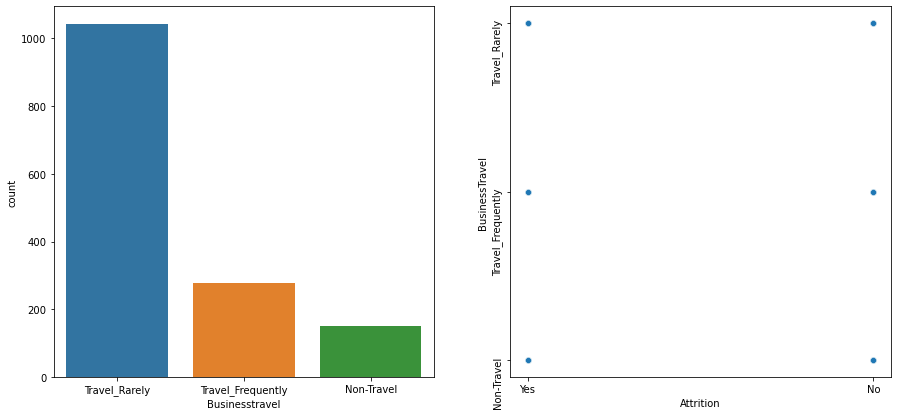

In [13]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['BusinessTravel'])
plt.xlabel('Businesstravel')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'BusinessTravel', data= an)
plt.xlabel('Attrition')
plt.ylabel('BusinessTravel')
plt.yticks(rotation= 90)
plt.show()

By looking at both the graphs of BusinessTravel we can conclude that Travel_Rarely most number of count from the distplot and from the scatterplot we can conclude that each category of BusinessTravel are present in both category of Attrition.

3. Daily Rate

In [14]:
an['DailyRate'].unique()

array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093, 1217, 1353,  120,  682,  489,
        807,  827,  871,  665, 1040, 1420,  240, 1280,  534, 1456,  658,
        142, 1127, 1031, 1189, 1354, 1467,  922,  394, 1312,  750,  441,
        684,  249,  841,  147,  528,  594,  470,  957,  542,  802, 1355,
       1150, 1329,  959, 1033, 1316,  364,  438,  689,  201, 1427,  857,
        933, 1181, 1395,  662, 1436,  194,  967, 14

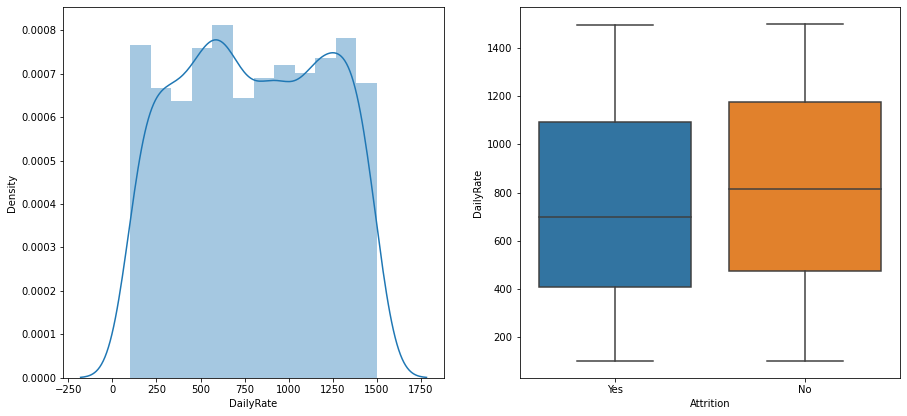

In [15]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['DailyRate'])
plt.xlabel('DailyRate')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'DailyRate', data= an)
plt.xlabel('Attrition')
plt.ylabel('DailyRate')
plt.show()

By looking at both the graphs of DailyRate we can conclude that we cannot determine the skewness of data with having the highest density around 625 and plot line is showing 2 peaks in graph from the distplot and from the boxplot we can conclude that there is no outliers present in any category of Attrition.

4. Department

In [16]:
an['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

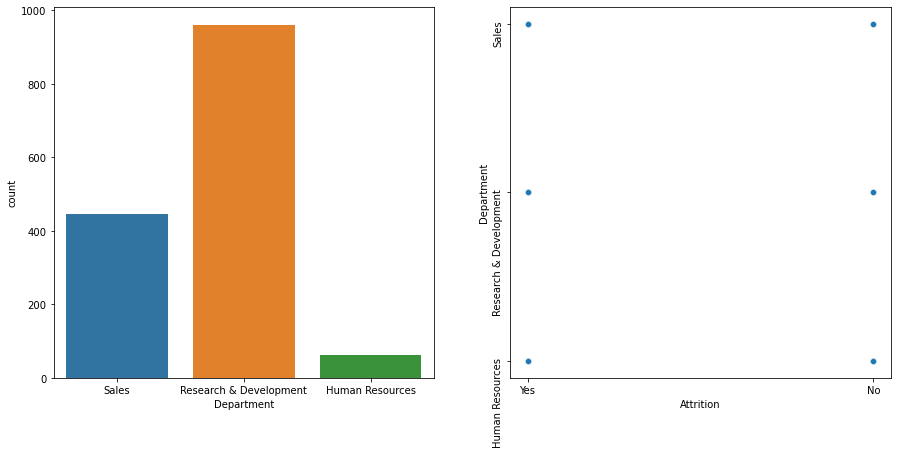

In [18]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['Department'])
plt.xlabel('Department')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'Department', data= an)
plt.xlabel('Attrition')
plt.ylabel('Department')
plt.yticks(rotation= 90)
plt.show()

By looking at both the graphs of Department we can conclude that most number of Department present is Research & Development from the countplot and from the scatterplot we can conclude that each category of department has both category of Attrition.

5. Distance From Home

In [19]:
an['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

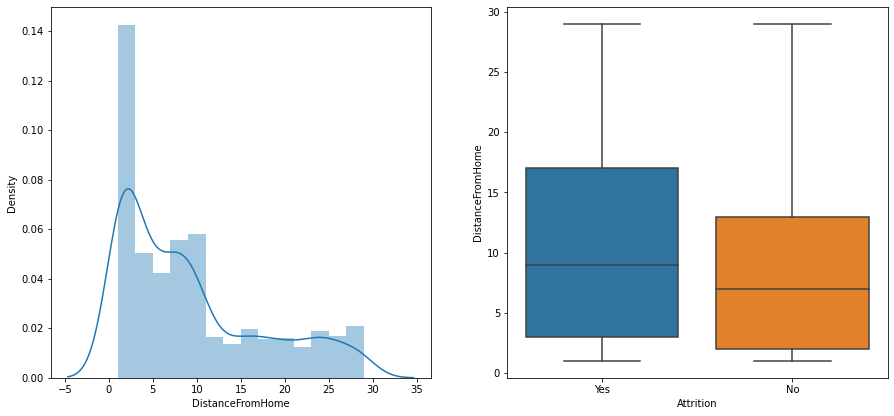

In [20]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['DistanceFromHome'])
plt.xlabel('DistanceFromHome')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'DistanceFromHome', data= an)
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.show()

By looking at both graphs of DistanceFromHome we ca conclude that data is positively skewed with having highest density around 2 from the distplot and from the boxplot we can conclude that no outliers present in both category of Attrition.

6. Education

In [21]:
an['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

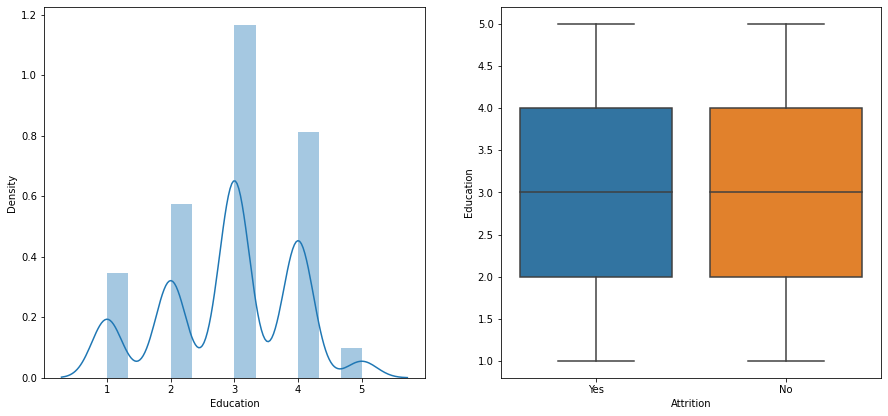

In [22]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['Education'])
plt.xlabel('Education')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'Education', data= an)
plt.xlabel('Attrition')
plt.ylabel('Education')
plt.show()

By looking at both the graphs of Education we can conclude that we cannot determine the skewness of data but data is having highest density at 3 and plot line is showing wave sign with multiple peaks in graph from distplot and from boxplot we can conclude that there is not outlier of Education present in any category of Attrition.

7. EducationField

In [23]:
an['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

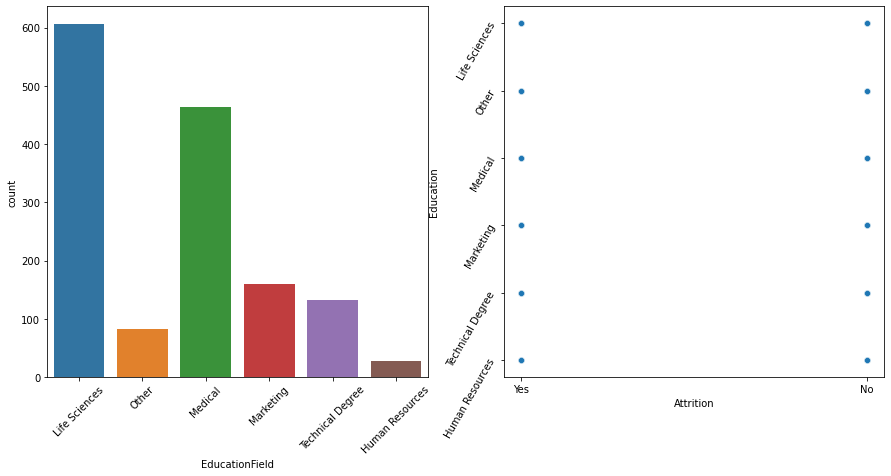

In [26]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['EducationField'])
plt.xlabel('EducationField')
plt.xticks(rotation= 45)
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'EducationField', data= an)
plt.xlabel('Attrition')
plt.ylabel('Education')
plt.yticks(rotation= 60)
plt.show()

By looking at both the fields of EducationField we can conclude that most number of data is present in Life Sciences category of EducationField from countplot and from scatterplot we can conclude that each category of EducationField has both category of Attrition present in them.

8. EmployeeCount

In [27]:
an['EmployeeCount'].unique()

array([1], dtype=int64)

As only one value present in the every row of of the whole column so there is no need to plot the graphs as we cannot conclude anything from doing it.

9. EmployeeNumber

In [28]:
an['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

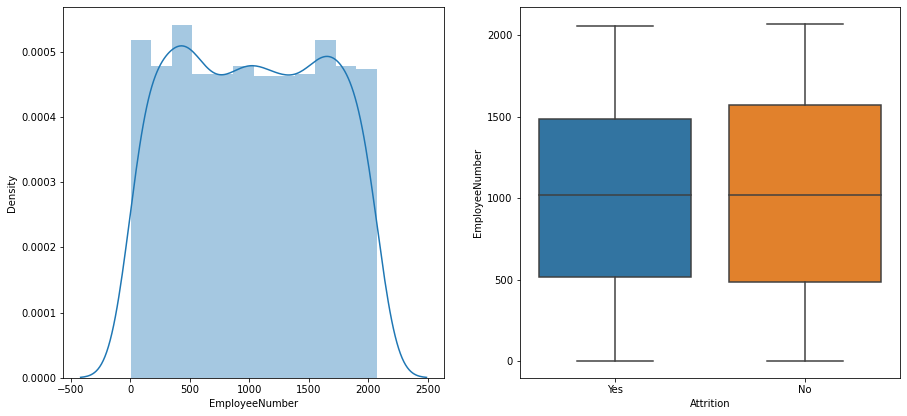

In [29]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['EmployeeNumber'])
plt.xlabel('EmployeeNumber')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'EmployeeNumber', data= an)
plt.xlabel('Attrition')
plt.ylabel('EmployeeNumber')
plt.show()

By looking at both the graphs of EmployeeNumber we can conclude that we cannot determine the skewness of the data but data is having highest density at around 400 from the distplot and from the boxplot we can conclude that no outliers is present in any category of Attrition is present.

10. EnviornmentSatisfaction

In [30]:
an['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

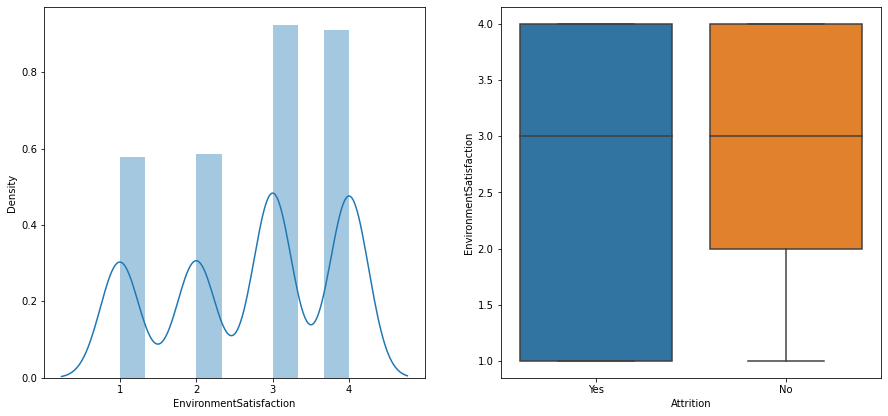

In [31]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['EnvironmentSatisfaction'])
plt.xlabel('EnvironmentSatisfaction')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'EnvironmentSatisfaction', data= an)
plt.xlabel('Attrition')
plt.ylabel('EnvironmentSatisfaction')
plt.show()

By looking at both the graphs of EnvironmentSatisfaction we can conclude that we cannot determine the skewness of data but data is having highest density at 3. Also plot line is like wave sign with showing multiple peaks on it from the distplot and from the boxplot we can conclude that no outliers are present of EnvironmentSatisfaction present in any category of Attrition.

11. Gender

In [32]:
an['Gender'].unique()

array(['Female', 'Male'], dtype=object)

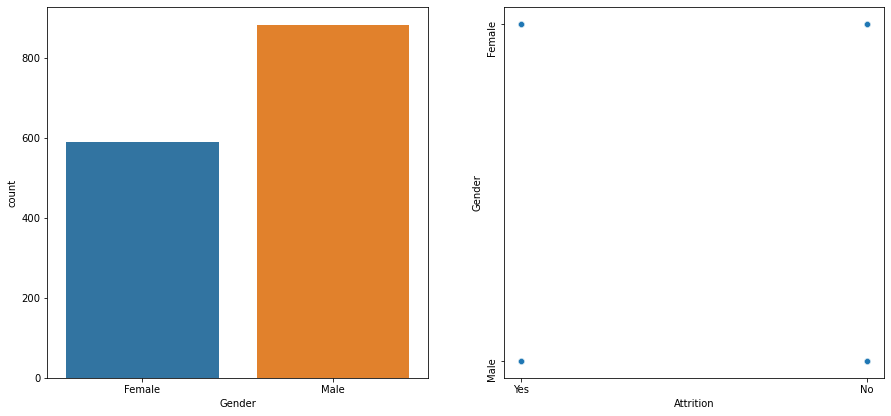

In [35]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['Gender'])
plt.xlabel('Gender')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y='Gender',data= an)
plt.xlabel('Attrition')
plt.ylabel('Gender')
plt.yticks(rotation= 90)
plt.show()

By looking at both the graphs of Gender we can conclude that most number of employees present are of male gender from countplot and from scatterplot we can conclude that both type of Gender are present in both category of Attrition.

12. HourlyRate

In [36]:
an['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

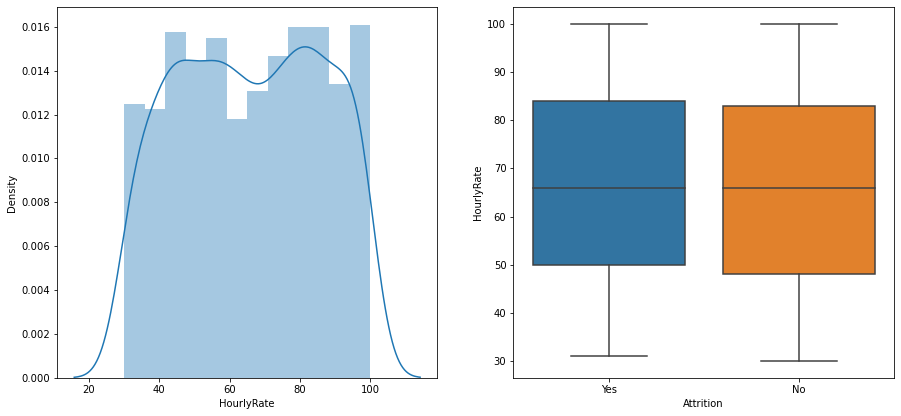

In [37]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['HourlyRate'])
plt.xlabel('HourlyRate')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'HourlyRate', data= an)
plt.xlabel('Attrition')
plt.ylabel('HourlyRate')
plt.show()

By looking at both the graphs of HourlyRate we can conclude that we cannot determine the skewness of data but data is having highest desnity at near 100 from the distplot and from the boxplot we can conclude that there no pressence of HourlyRate outliers in any category of Attrition.

13. JobInvolvement

In [38]:
an['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

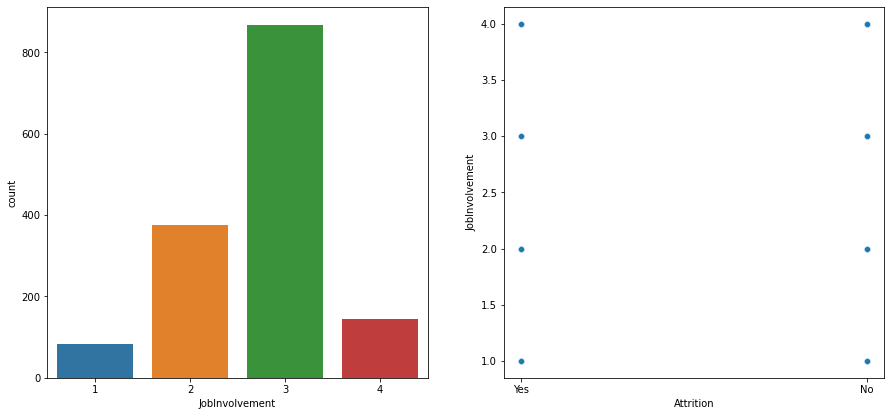

In [39]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['JobInvolvement'])
plt.xlabel('JobInvolvement')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'JobInvolvement', data= an)
plt.xlabel('Attrition')
plt.ylabel('JobInvolvement')
plt.show()

By looking at both the graphs of JobInvolvement we can conclude that most number of data is present in 3 category of JobInvolvement from the countplot and from scatterplot we can conclude that every category of JobInvolvement is present in both category of Attrition.

14. JobLevel

In [40]:
an['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

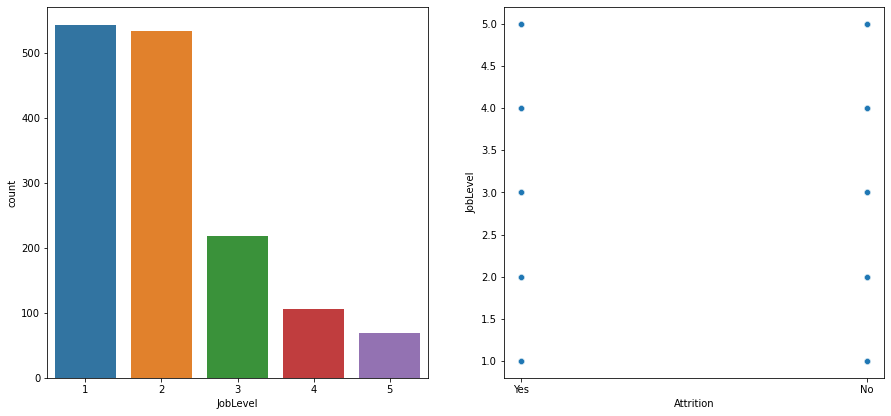

In [41]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['JobLevel'])
plt.xlabel('JobLevel')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'JobLevel', data= an)
plt.xlabel('Attrition')
plt.ylabel('JobLevel')
plt.show()

By looking at both the graphs of JobLevel we can conclude that most number of data is present in 1 category of JobLevel from the countplot and from the scatterplot we can conclude that every category of JobLevel is present in both the category Attrition.

15. JobRole

In [42]:
an['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

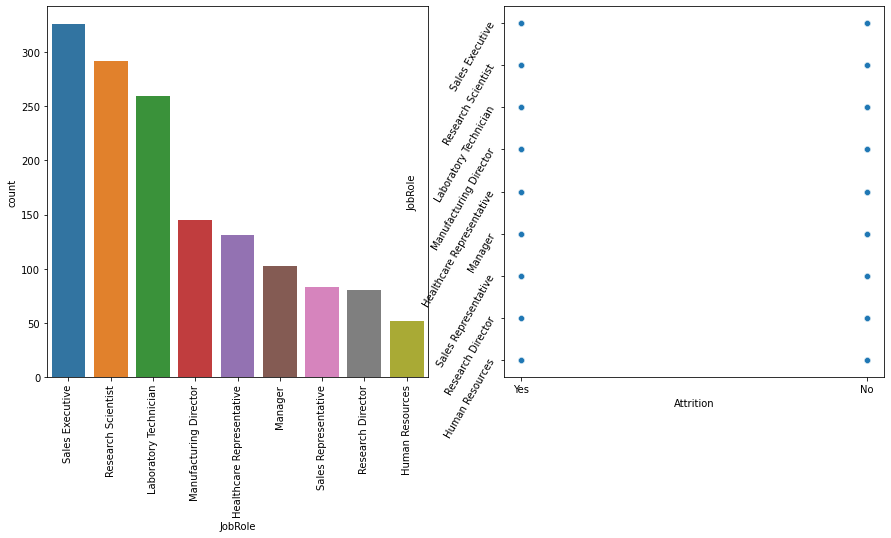

In [46]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['JobRole'])
plt.xlabel('JobRole')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'JobRole', data= an)
plt.xlabel('Attrition')
plt.ylabel('JobRole')
plt.yticks(rotation= 60)
plt.show()

By looking at both the graph of JobRole we can conclude that most number of employees present in Sales Executive JobRole from the countplot and from scatterplot we can conclude that each category of JobRole is present in both category of Attrition.

16. JobSatisfaction

In [47]:
an['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

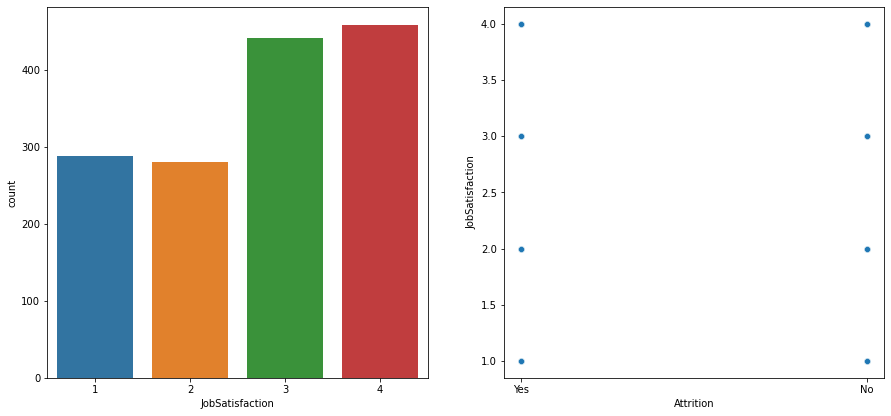

In [48]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['JobSatisfaction'])
plt.xlabel('JobSatisfaction')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'JobSatisfaction', data= an)
plt.xlabel('Attrition')
plt.ylabel('JobSatisfaction')
plt.show()

By looking at both the graphs of JobSatisfaction we can conclude that most number of employees present in category 4 of JobSatisfaction from the countplot and from scatterplot we can conclude the every category of JobSatisfaction is present in both category of Attrition.

17. Marital Status

In [49]:
an['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

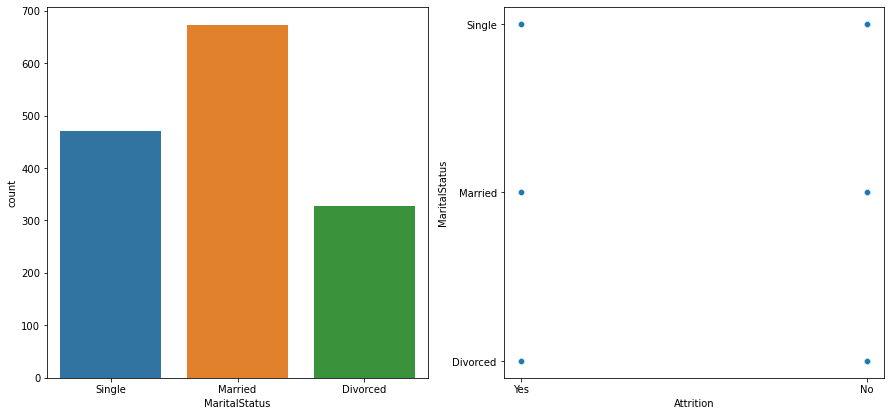

In [50]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['MaritalStatus'])
plt.xlabel('MaritalStatus')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'MaritalStatus', data= an)
plt.xlabel('Attrition')
plt.ylabel('MaritalStatus')
plt.show()

By looking at both graphs of maritalstatus we can conclude that most number of employees present are married from the countplot and from the scatterplot we can conclude every category of marital status is present in both category of Attrition.

18. MonthlyIncome

In [51]:
an['MonthlyIncome'].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

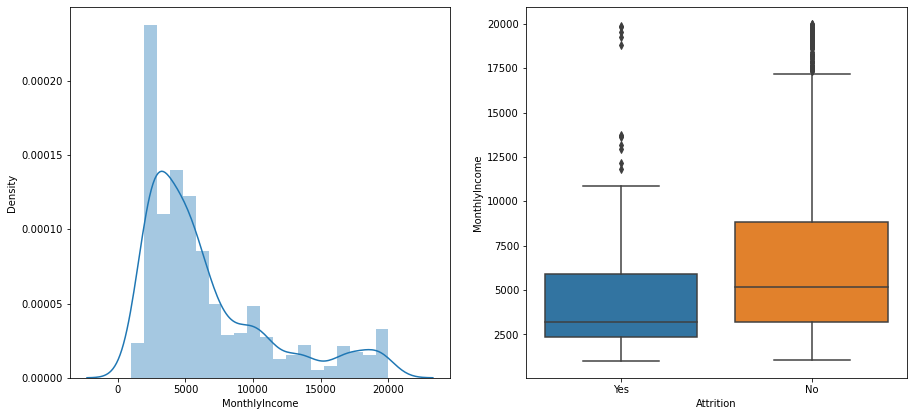

In [52]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['MonthlyIncome'])
plt.xlabel('MonthlyIncome')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'MonthlyIncome', data= an)
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.show()

By looking at both the graphs of monthly income qwe can conclude that data is positively skewed with having hoighest density around 3000 from distplot and from boxplot we can conclude that outliers are present in both categories of Attrition.

19. MonthlyRate

In [53]:
an['MonthlyRate'].unique()

array([19479, 24907,  2396, ...,  5174, 13243, 10228], dtype=int64)

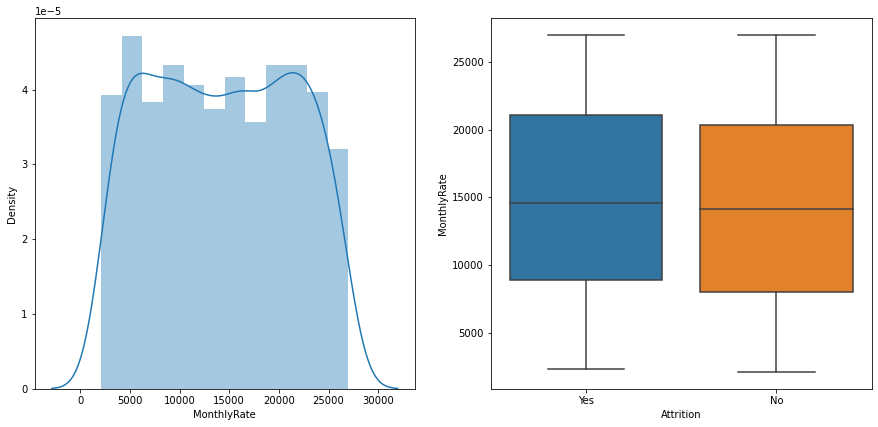

In [54]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['MonthlyRate'])
plt.xlabel('MonthlyRate')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'MonthlyRate', data= an)
plt.xlabel('Attrition')
plt.ylabel('MonthlyRate')
plt.show()

By looking at both graphs of MonthlyRate we can conclude that we cannot determine the skewness of data with having the highest density around 5000 from the distplot and from the boxplot we can conclude that there is no outliers present in any category of Attrition.

20. NumCompaniesWorked

In [55]:
an['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

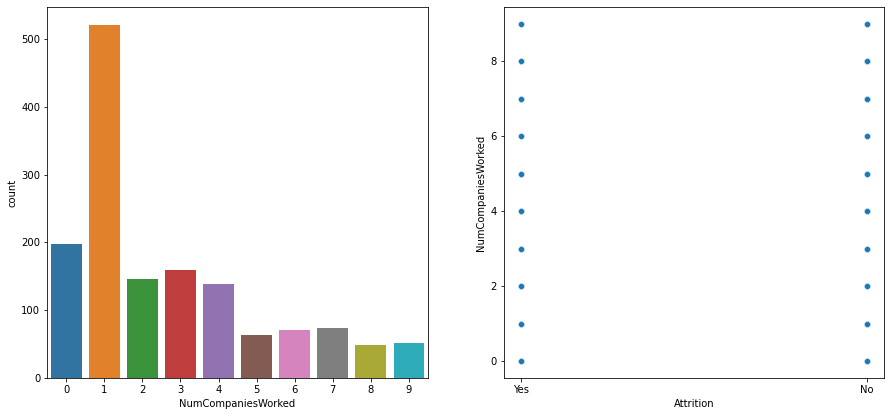

In [56]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['NumCompaniesWorked'])
plt.xlabel('NumCompaniesWorked')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'NumCompaniesWorked', data= an)
plt.xlabel('Attrition')
plt.ylabel('NumCompaniesWorked')
plt.show()

By looking at both the graphs of NumCompaniesWorked we can conclude that most number of data is present in category 1 from the countplot and from the scatterplot we can conclude that every category of NumCompaniesWorked is present in both categories of Attrition.

21. Over18

In [57]:
an['Over18'].unique()

array(['Y'], dtype=object)

As there is only one value present in every row of the whole column then there is no need to plot the graphs as we cannot make any conclusion from them.

22. OverTime

In [58]:
an['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

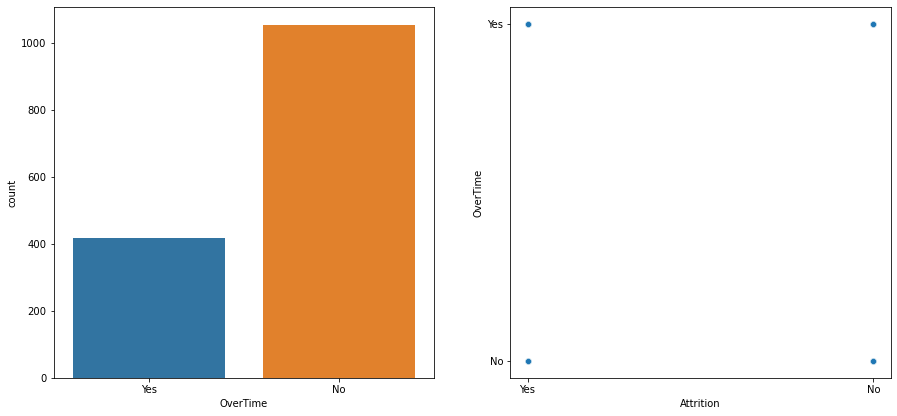

In [59]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['OverTime'])
plt.xlabel('OverTime')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'OverTime', data= an)
plt.xlabel('Attrition')
plt.ylabel('OverTime')
plt.show()

By looking at both the graphs of OverTime we can conclude that most employees don't do OverTime from the countplot and from the scatterplot we can conclude both categories of OverTime are present in both categories of Attrition.

23. PercentSalaryHike

In [60]:
an['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

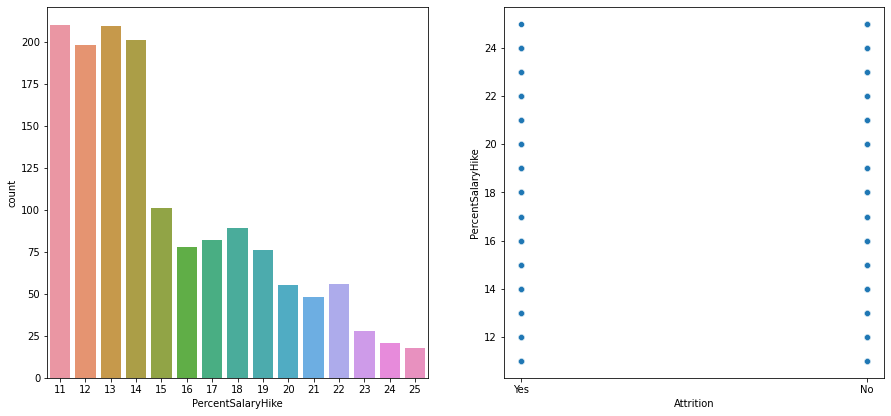

In [61]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['PercentSalaryHike'])
plt.xlabel('PercentSalaryHike')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'PercentSalaryHike', data= an)
plt.xlabel('Attrition')
plt.ylabel('PercentSalaryHike')
plt.show()

By looking at both the graphs of PercentSalaryHike we can conclude that most employees get 11 PercentSalaryHike from countplot and from scatterplot we can conclude that every category of PercentSalaryHike is present in both categories of Attrition.

24. PerformanceRating

In [63]:
an['PerformanceRating'].unique()

array([3, 4], dtype=int64)

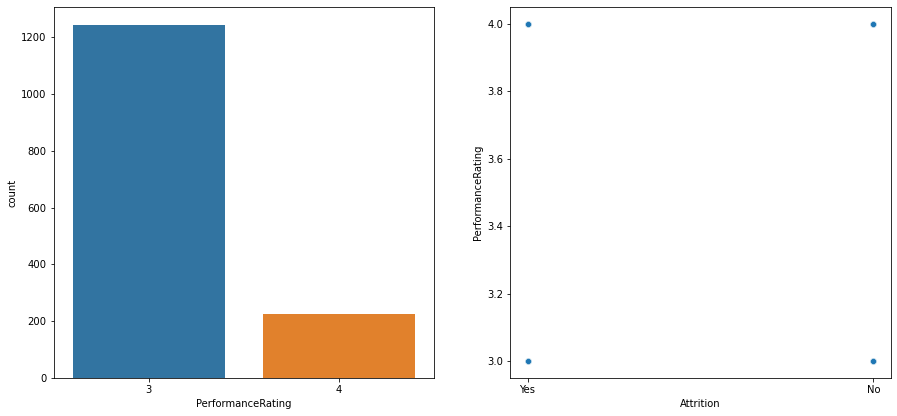

In [64]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['PerformanceRating'])
plt.xlabel('PerformanceRating')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'PerformanceRating', data= an)
plt.xlabel('Attrition')
plt.ylabel('PerformanceRating')
plt.show()

By looking at both graphs of PerformanceRating we can conclude that most employee have category 3 PerformanceRating from countplot and from scatterplot we can conclude that both categories of PerformanceRating are present in both categories of Attrition.

25. RelationshipSatisfaction

In [65]:
an['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

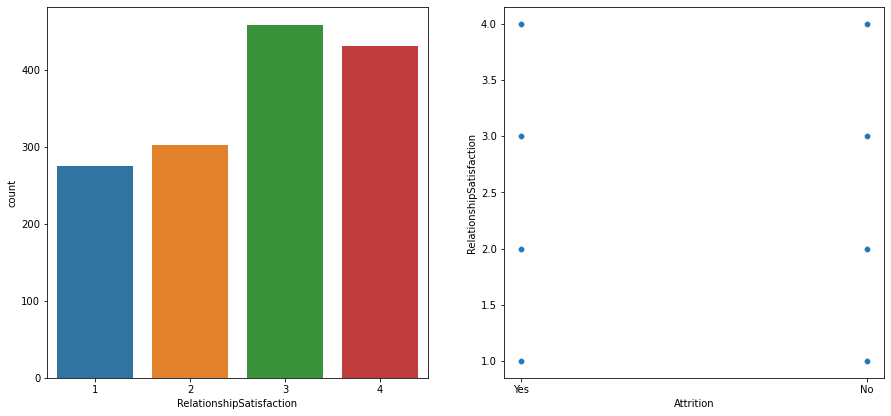

In [66]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['RelationshipSatisfaction'])
plt.xlabel('RelationshipSatisfaction')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'RelationshipSatisfaction', data= an)
plt.xlabel('Attrition')
plt.ylabel('RelationshipSatisfaction')
plt.show()

By looking at both the graphs of RelationshipSatisfaction we can conclude most employees have category 3 RelationshipSatisfaction from countplot and from scatterplot we can conclude that every categories of RelationshipSatisfaction present in both categories of Attrition.

26. StandardHours

In [67]:
an['StandardHours'].unique()

array([80], dtype=int64)

There is only one value present in every row of whole column so we cannot conclude anything from it by ploting the graphs.

27. StockOptionLevel

In [68]:
an['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

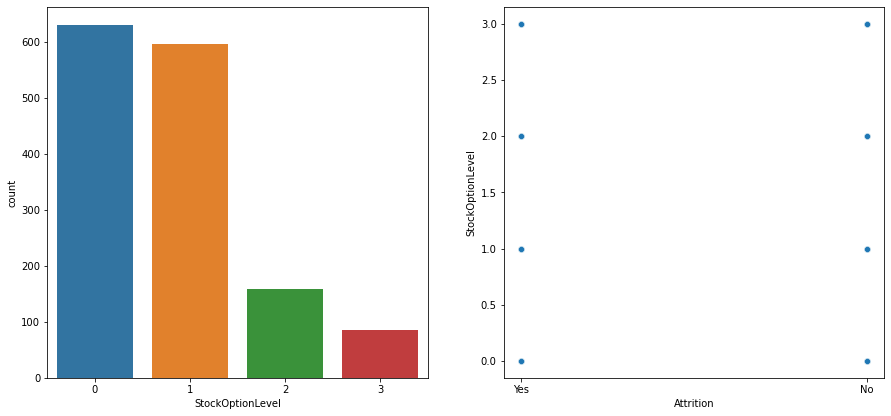

In [69]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['StockOptionLevel'])
plt.xlabel('StockOptionLevel')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'StockOptionLevel', data= an)
plt.xlabel('Attrition')
plt.ylabel('StockOptionLevel')
plt.show()

By looking at both graphs of StockOptionLevel we can conclude that most employees have 0 stockoptionlevel from countplot and from scatterplot we can conclude that every category of StockOptionLevel is present in both categories of Attrition.

28. TotalWorkingYears

In [70]:
an['TotalWorkingYears'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

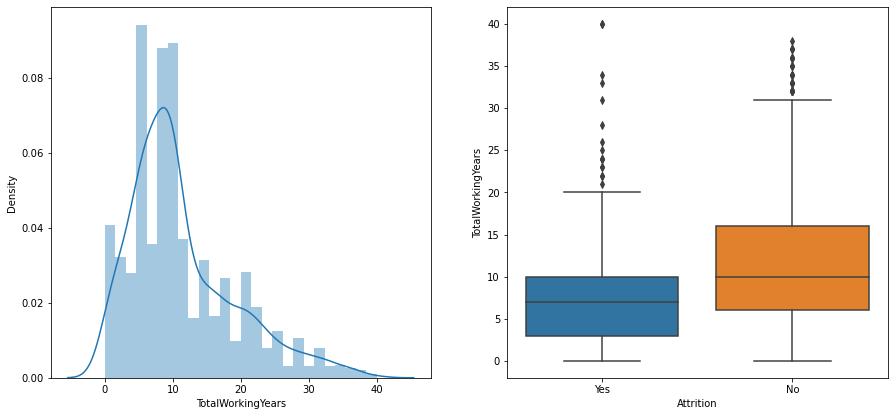

In [71]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['TotalWorkingYears'])
plt.xlabel('TotalWorkingYears')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'TotalWorkingYears', data= an)
plt.xlabel('Attrition')
plt.ylabel('TotalWorkingYears')
plt.show()

By looking at both the graphs of TotalWorkingYears we can conclude that data is positively skewed with having highest density at around 6 from the distplot and from the boxplot we can conclude that outliers are present in both categories of Attrition.

29. TrainingTimesLastYear 

In [72]:
an['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

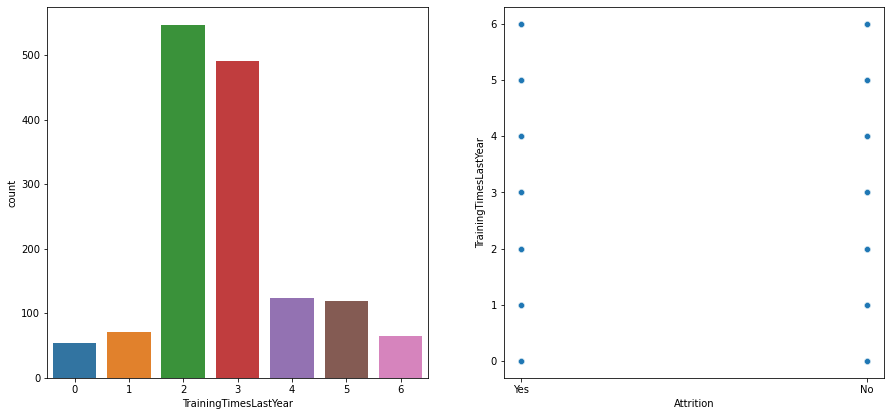

In [74]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['TrainingTimesLastYear'])
plt.xlabel('TrainingTimesLastYear')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'TrainingTimesLastYear', data= an)
plt.xlabel('Attrition')
plt.ylabel('TrainingTimesLastYear')
plt.show()

By looking at both graphs of TrainingTimesLastYear we can conclude that most data is present in category 2 from countplot and from scatterplot we can conclude that every category of TrainingTimesLastYear is present in both categories of Attrition.

30. WorkLifeBalance

In [75]:
an['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

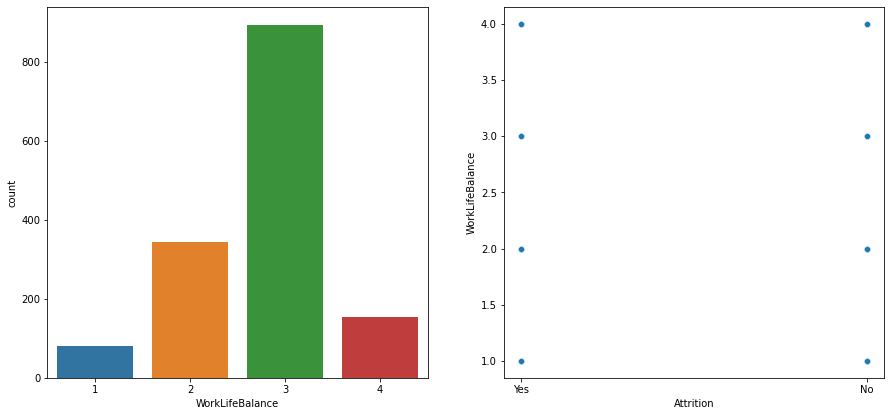

In [76]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(an['WorkLifeBalance'])
plt.xlabel('WorkLifeBalance')
plt.subplot(222)
sns.scatterplot(x= 'Attrition', y= 'WorkLifeBalance', data= an)
plt.xlabel('Attrition')
plt.ylabel('WorkLifeBalance')
plt.show()

By looking at both graphs of WorkLifeBalance we can conclude that most data is present in category 3 from countplot and from scatterplot we can conclude that every category of WorkLifeBalance is present in both categories of Attrition.

31. YearsAtCompany 

In [77]:
an['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

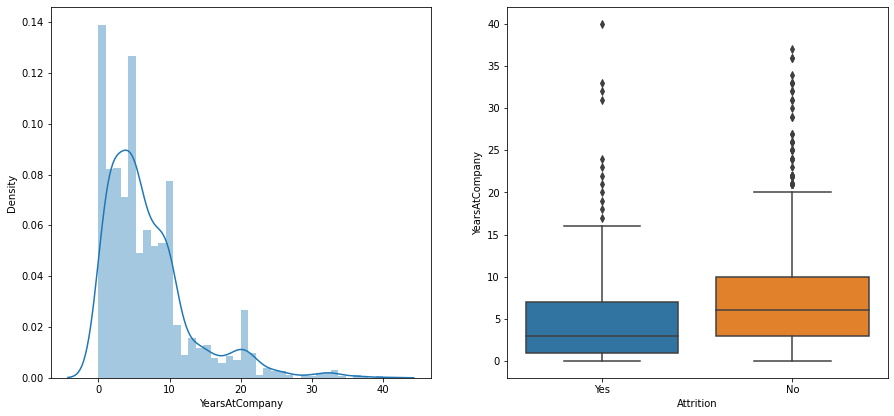

In [78]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['YearsAtCompany'])
plt.xlabel('YearsAtCompany')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'YearsAtCompany', data= an)
plt.xlabel('Attrition')
plt.ylabel('YearsAtCompany')
plt.show()

By looking at both the graphs of YearsAtCompany we can conclude that data is positively skewed with having highest density at around 1 from distplot and from boxplot we can conclude that outliers are present in both categories of Attrition.

32. YearsInCurrentRole 

In [79]:
an['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

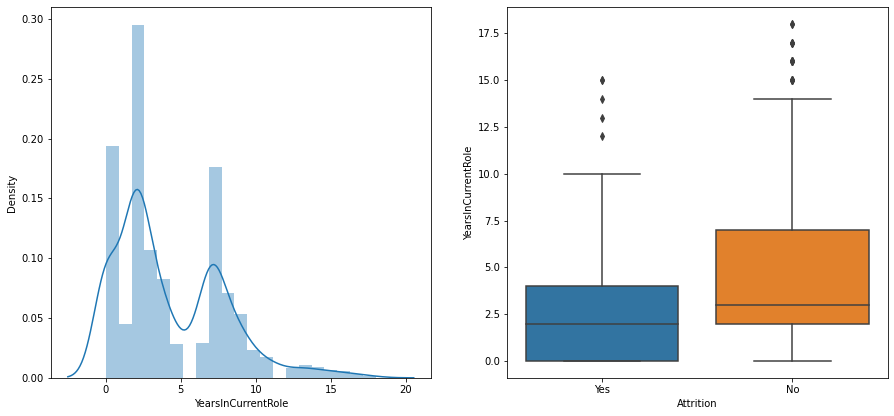

In [80]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['YearsInCurrentRole'])
plt.xlabel('YearsInCurrentRole')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'YearsInCurrentRole', data= an)
plt.xlabel('Attrition')
plt.ylabel('YearsInCurrentRole')
plt.show()

By looking At both the graphs of YearsInCurrentRole we can conclude that data is positively skewed with having highest density at around 3 from distplot and from the boxplot we can conclude that outliers of YearsInCurrentRole is present in both categories of Attrition.

33. YearsSinceLastPromotion

In [81]:
an['YearsSinceLastPromotion'].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14],
      dtype=int64)

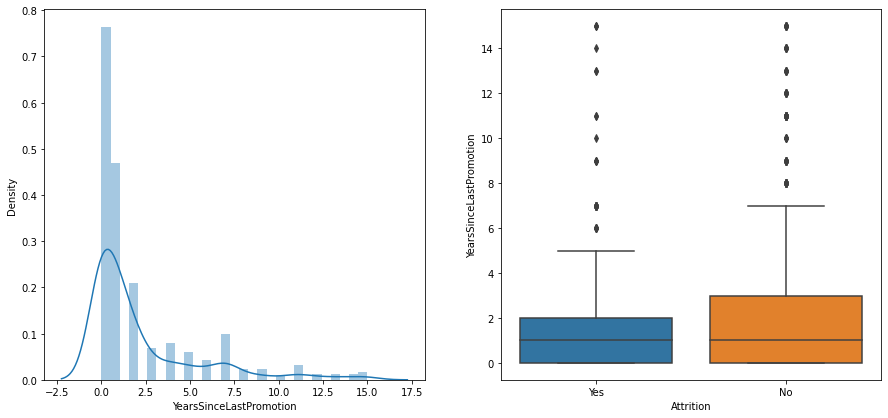

In [82]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['YearsSinceLastPromotion'])
plt.xlabel('YearsSinceLastPromotion')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'YearsSinceLastPromotion', data= an)
plt.xlabel('Attrition')
plt.ylabel('YearsSinceLastPromotion')
plt.show()

By looking at both the graphs of YearsSinceLastPromotion we can conclude that data is positively skewed with ahving highest density at around 1 from distplot and from boxplot we can conclude that there is pressence of outliers of YearsSinceLastPromotion is present in both categories of Attrition.

34. YearsWithCurrManager

In [83]:
an['YearsWithCurrManager'].unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

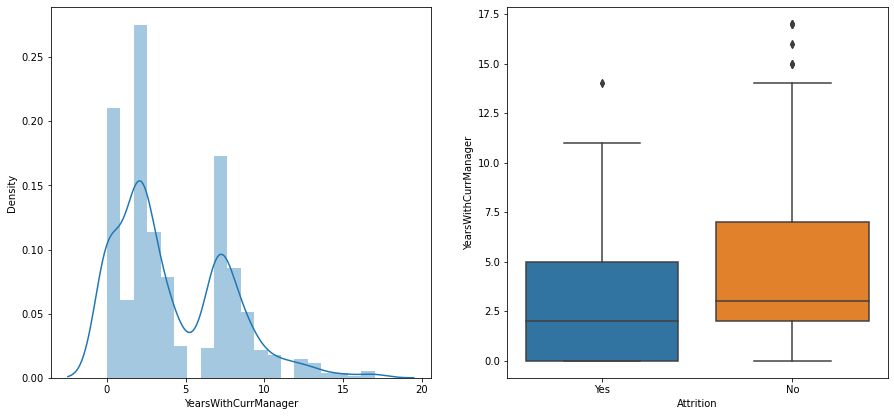

In [84]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(an['YearsWithCurrManager'])
plt.xlabel('YearsWithCurrManager')
plt.subplot(222)
sns.boxplot(x= 'Attrition', y= 'YearsWithCurrManager', data= an)
plt.xlabel('Attrition')
plt.ylabel('YearsWithCurrManager')
plt.show()

By looking at both the graphs of YearWithCurrManager we can conclude that data is positively skewed with having highest density at around 3 and plot line is showing 2 peaks in graph from distplot and from boxplot we can conclude that outliers of YearWithCurrManager is present in both categories of Attrition.

#### Now Changing the data types of each and every columns to int or float data types.

In [85]:
an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [86]:
an['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [87]:
an['BusinessTravel'] = an['BusinessTravel'].replace(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],[0,1,2])

In [88]:
an['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [89]:
an['Department'] = an['Department'].replace(['Sales', 'Research & Development', 'Human Resources'],[0,1,2])

In [90]:
an['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [91]:
an['EducationField'] = an['EducationField'].replace(['Life Sciences', 'Other', 'Medical', 'Marketing','Technical Degree', 'Human Resources'],
                                                   [0,1,2,3,4,5])

In [92]:
an['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [93]:
an['Gender'] = an['Gender'].replace(['Female','Male'],[1,0])

In [94]:
an['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [95]:
an['JobRole'] = an['JobRole'].replace(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
                                       'Manufacturing Director', 'Healthcare Representative', 'Manager',
                                       'Sales Representative', 'Research Director', 'Human Resources'],[0,1,2,3,4,5,6,7,8])

In [96]:
an['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [97]:
an['MaritalStatus'] = an['MaritalStatus'].replace(['Single', 'Married', 'Divorced'],[0,1,2])

In [98]:
an['Over18'].unique()

array(['Y'], dtype=object)

In [99]:
an['Over18'] = an['Over18'].replace(['Y'],[1])

In [100]:
an['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [101]:
an['OverTime'] = an['OverTime'].replace(['Yes','No'],[1,0])

In [102]:
an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We cannot check the multi collinearity of the dataset as target feature is categorical and is in string format and we cannot change the target features dataset.

#### Now we need to find best suited model for this dataset.

In [103]:
X = an.drop(['Attrition'], axis= 1)
y = an['Attrition']

1. Logistic Regression Model

In [104]:
scaler = StandardScaler()
lr = LogisticRegression()
trainaccuracy = []
testaccuracy = []
for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    lr.fit(scaledX_train, y_train)
    trainaccuracy.append(lr.score(scaledX_train, y_train))
    testaccuracy.append(lr.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.881949772390159
test accuracy :  0.86609380594343


Decision Tree Classification Model

In [105]:
dtc = DecisionTreeClassifier(criterion= 'entropy')
for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    dtc.fit(scaledX_train, y_train)
    trainaccuracy.append(dtc.score(scaledX_train, y_train))
    testaccuracy.append(dtc.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.9409748861950796
test accuracy :  0.8263515932688863


3. Random Forest Classification Model

In [106]:
rfc = RandomForestClassifier(criterion= 'entropy')
for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    rfc.fit(scaledX_train, y_train)
    trainaccuracy.append(rfc.score(scaledX_train, y_train))
    testaccuracy.append(rfc.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.9605987758511926
test accuracy :  0.835581016032144


4. Bagging Classification Model

In [107]:
bac = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy'))
for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    bac.fit(scaledX_train, y_train)
    trainaccuracy.append(bac.score(scaledX_train, y_train))
    testaccuracy.append(bac.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.9662804971612704
test accuracy :  0.8395691609977325


As we can all see that highest train accuracy is calculated by Bagging Classification model but highest test accuracy is calculated by Logisitic Regression model. So we need to go with the model who is giving highest test accuracy which Logisitc Regression.

#### Now applying the chosen model on the dataset for prediction. 

In [131]:
lr = LogisticRegression()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 167)

In [139]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [140]:
pred = lr.fit(scaledX_train, y_train).predict(scaledX_test)

In [141]:
print('Accuracy score : ', metrics.accuracy_score(y_test, pred))

Accuracy score :  0.8843537414965986


In [142]:
print('Confusion matrix : ')
metrics.confusion_matrix(y_test, pred)

Confusion matrix : 


array([[360,  11],
       [ 40,  30]], dtype=int64)

In [143]:
metrics.cohen_kappa_score(y_test, pred)

0.47950753280414715

#### By observing the various metrices of model on the dataset we can conclude that this model is working perfectly on this dataset. Now we need to save the model.

In [144]:
save_lr = pickle.dumps(lr)

#### Hence we have made the prediction using best suited model for dataset and have saved it. Hence objective has been achieved.